# Pymaceuticals Inc.
---

### Analysis

This code imports necessary libraries and reads from two csv files containing data on mice and the results of a drug study. It then merges the two datasets into one based on their shared Mouse ID.

Next, it checks for duplicate mice in the dataset and removes them to create a clean dataset.

It then calculates summary statistics (mean, median, variance, standard deviation, and SEM) for the tumor volume of each drug regimen and creates two tables summarizing this information: summary_table and summary.

Two bar plots are generated, one using Pandas and the other using pyplot, showing the total number of mouse timepoints for each drug regimen. We can observe that (Capomilun and Ramicane) have the most timepoints both over 200 each, compare to (Propriva) that was the lowest parametres. 
Two pie charts are also created showing the distribution of female versus male mice (51% v 49%), showing that male has a slightly more percetage over females, one using Pandas and the other using pyplot. 

Next, we calculate the final tumor volume of each mouse across four specific treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) and creates a box plot showing the distribution of final tumor volumes for each treatment. Infubinal is noteworthy in this box plot as it has an outlier outside of the upper and lower bands at 36.321346 and this is highlights with a circle colored in red.

Next, we created line plots and the first plot  shows the relationship between tumor volume and time point for a single mouse treated with Capomulin. The x-axis represents the time point (in days), and the y-axis represents the tumor volume (in mm3). The plot helps visualize how the tumor volume changes over time in response to the treatment. You can see that Timepoint 20 days, the tumor volume is 48 mm3 and begins to drop significantly in the following timepoints.

The second plot is a scatter plot that shows the relationship between mouse weight and the average observed tumor volume for the entire Capomulin regimen. The x-axis represents the weight of the mouse (in grams), and the y-axis represents the average tumor volume (in mm3). The plot helps visualize any potential correlation between mouse weight and tumor volume, as heavier mice may be expected to have larger tumors.

Finally, we calculate the correlation coefficient = .84, a strong positive correlation. Then we calculate a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen. The correlation coefficient measures the strength and direction of the linear relationship between the two variables. The linear regression model helps quantify the relationship between the variables and predict the value of the dependent variable (tumor volume) based on the independent variable (mouse weight).

Linear Regression Results:

slope = 0.9544396890241048
intercept = 21.552160532685008
rvalue = 0.8419363424694721
pvalue = 1.3225722434712404e-07
stderr = 0.12754359033201323
intercept_stderr = 2.5909876867683455

The code then generates a scatter plot of the data and overlays a line that represents the linear regression model. The plot also displays the correlation coefficient and a title that summarizes the findings of the analysis.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
study_data_complete.head()

# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].nunique()
mouse_count

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

no_duplicate_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
no_duplicate_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice in the clean DataFrame.

mice_count_clean = no_duplicate_data["Mouse ID"].nunique()
mice_count_clean


248

### Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


means = no_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = no_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = no_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = no_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = no_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":std,
                              "Tumor Volume Std. Err.":sems})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary = no_duplicate_data.groupby('Drug Regimen').aggregate(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)' ]

summary

/var/folders/7r/yz0t0z8x2ll63wv5qrkg6s7r0000gn/T/ipykernel_52088/1591937210.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = no_duplicate_data.groupby('Drug Regimen').aggregate(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)' ]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie charts

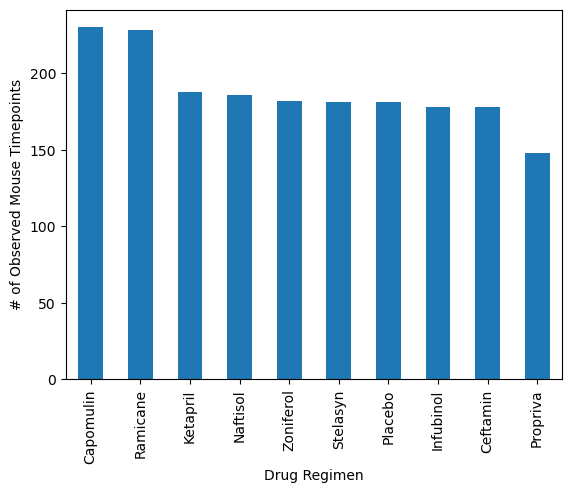

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts = no_duplicate_data['Drug Regimen'].value_counts()
counts.plot(kind="bar") 
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel('Drug Regimen')
plt.show()




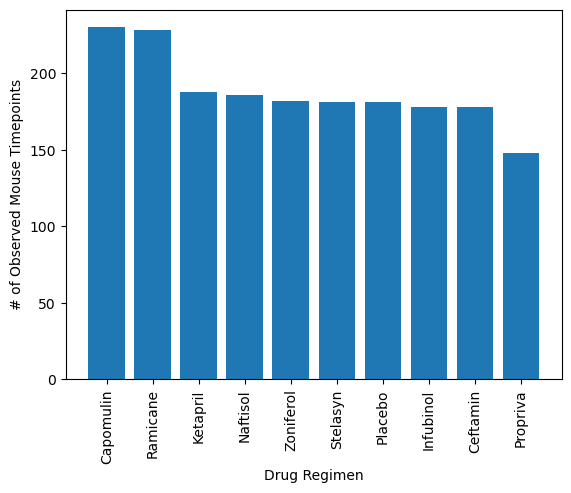

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#x = no_duplicate_data['Drug Regimen'].value_counts()
#y = no_duplicate_data['Timepoint'].value_counts()
#x.plot(kind="bar")

#plt.xlabel('Drug Regimen')
#plt.ylabel('# of Observed Mouse Timepoints')
#plt.show()

counts = no_duplicate_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


### finihsed

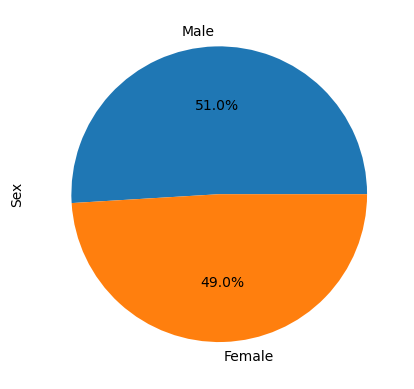

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = no_duplicate_data['Sex'].value_counts()
sex_counts.plot(kind="pie",autopct='%1.1f%%')

plt.show()

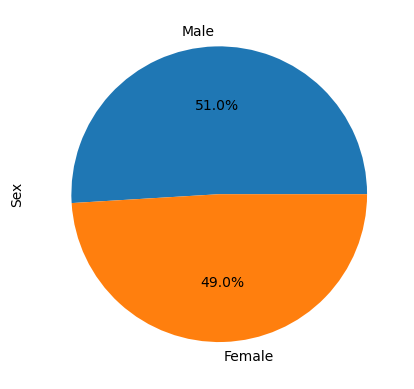

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()


### Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_greatest_timepoint = no_duplicate_data.groupby(['Mouse ID'])['Timepoint'].max()    
max_tumor = mouse_greatest_timepoint.reset_index() 

max_tumor_volume = pd.merge(max_tumor, no_duplicate_data, how='left', on= ['Mouse ID','Timepoint']) 
max_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [35]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_to_filter = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

for drug in treatments_to_filter:
    final_tumor_vol = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    
    
#for drug in treatments_to_filter:
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

     # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


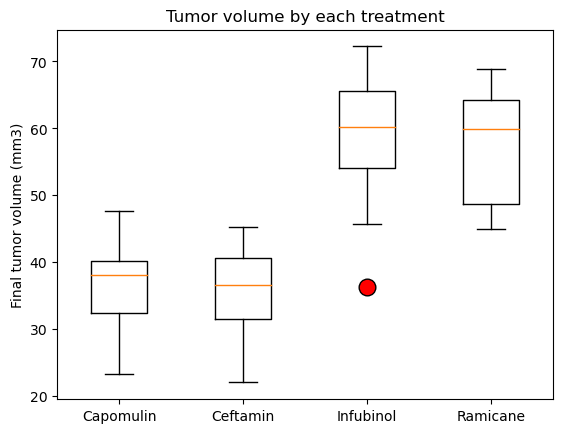

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
s = pd.Series(tumor_vol_list)
values = s.values
orange_out = dict(markerfacecolor='red',markersize=12)

fig, ax = plt.subplots()
ax.boxplot(values, flierprops=orange_out)

ax.set_title('Tumor volume by each treatment')
#ax.set_xlabel('Drugs')
ax.set_ylabel('Final tumor volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])


plt.show()


### Line and Scatter Plots

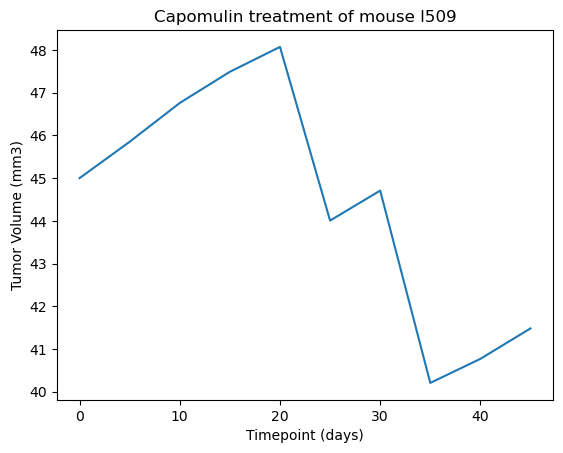

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_l509 = study_data_complete.loc[study_data_complete["Mouse ID"] == "l509"]

x_values = mouse_l509['Timepoint']
y_values = mouse_l509['Tumor Volume (mm3)']

plt.plot(x_values, y_values)
plt.title('Capomulin treatment of mouse l509')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Timepoint (days)')

plt.show()

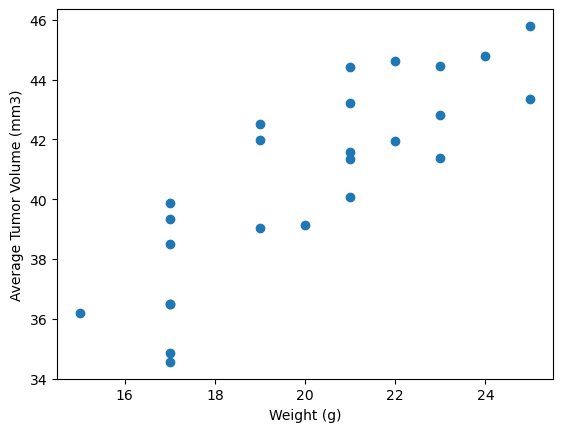

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#capomulin_weight = study_data_complete.loc[study_data_complete["Drug Regimen"] == "Capomulin"]

capomulin_weight = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"].groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

y_values = capomulin_weight['Tumor Volume (mm3)']
x_values = capomulin_weight['Weight (g)']

plt.scatter(x_values, y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


### Correlation and Regression

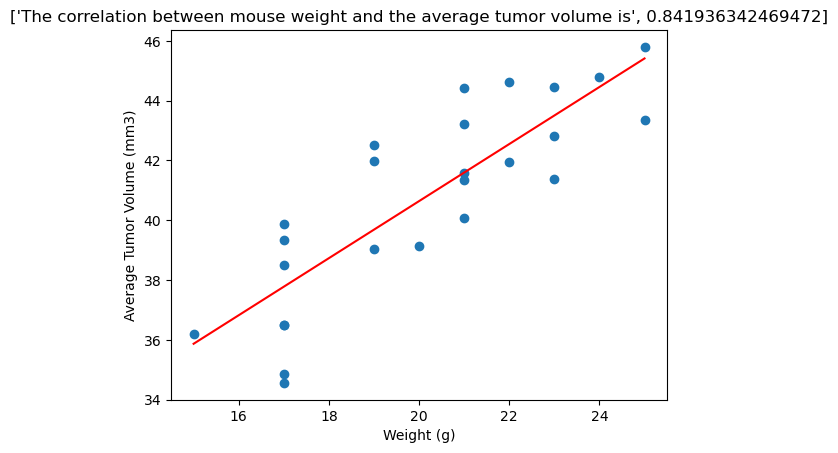

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

corr_coef = capomulin_weight['Tumor Volume (mm3)'].corr(capomulin_weight['Weight (g)'])
corr_coef

# linear regression model

y = capomulin_weight['Tumor Volume (mm3)']
x = capomulin_weight['Weight (g)']

linear_regression_mouse = linregress(x, y)

slope = linear_regression_mouse[0]
intercept = linear_regression_mouse[1]
# create a scatter plot of x vs. y
plt.scatter(x, y)

# generate the line for the linear regression model
line_x = [min(x), max(x)]
line_y = [slope * xi + intercept for xi in line_x]

# plot the line on top of the scatter plot
plt.plot(line_x, line_y, color='red')

# add labels and title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(['The correlation between mouse weight and the average tumor volume is', corr_coef])

# display the plot
plt.show()